# HOMEWORK 4 - Does basic house information reflect house's description?

First of all we import all the libraries we need and we have to initialize the empty dataframe.

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import time
import re

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

df = pd.DataFrame(columns=["Title", "Price","Locali","Superficie","Bagni","Piano","Description"])
address =  "https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag="
page = "https://www.immobiliare.it/"

It's time to web scraping..... add some comments.

In [ ]:
count=0
row=0
for i in range(1,651):
    address = "https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag="+str(i)
    url = requests.get(address)
    page =BeautifulSoup(url.text, 'lxml') 
    x = page.findAll('ul',{'class','annunci-list'})[0]
    
    types = ["vetrina","star","top","premium"]
    
    for t in types:
        
        for y in x.find_all('li', {'class', 'listing-item '+t+' js-row-detail'}):
            try:
                content = y.find('div',class_='listing-item_body--content')
                title = content.p.a.attrs
                if title['href'][:5]=="https":
                    site= title["href"]
                else:
                    site = 'https://www.immobiliare.it' + title['href']
                url2 = requests.get(site)
                page2 = BeautifulSoup(url2.text, 'lxml')
                descr = page2.find('div',class_='col-xs-12 description-text text-compressed')
                description = descr.div.text.strip()
                price = content.find('li', class_='lif__item lif__pricing').text
                locali_superficie = content.find_all(class_= 'text-bold')
                locali = locali_superficie[0].text
                superficie = locali_superficie[1].text
                bagni = locali_superficie[2].text
                piano = locali_superficie[3].text.strip()
                if len(piano)>3:
                    raise
                
                df.loc[row] = [title['title'],price.strip(),locali,superficie,bagni,piano,description]
                row+=1

            except:
                #print("Not considering a column")
                count+=1


We write a .csv file to have the dataframe without rerunning every time the code of the web scraping.

In [7]:
df.to_csv("dataset.csv")

In [12]:
#the number of announcements obtained
print(row)
#the number of announcements dropped:
print(count)
df.head()

12453


,Title,Price,Locali,Superficie,Bagni,Piano,Description
0,"Bilocale viale Italo Calvino, Fonte Ostiense, ...",€ 225.000,2,50,1,1,PAPILLO EUR in elegante complesso residenziale...
1,"Bilocale via Ezio Sciamanna 12, Torrevecchia, ...",€ 159.000€ 169.000(-5.9%),2,65,1,R,Rif: 18083 - TORREVECCHIA - Via Ezio Sciamanna...
2,"Attico / Mansarda via Taranto 100, San Giovann...",€ 459.000,2,85,1,A,"San Giovanni, Attico in Vendita, via Taranto l..."
3,"Attico / Mansarda via Degli Orti Di Galba, Mon...",€ 850.000,5,175,2,A,"Nel quartiere Monteverde, a poche decine di me..."
4,"Appartamento via San Sotero, Gregorio VII - Pi...",€ 1.100.000,5+,225,3+,3,Gregorio Settimo - San Damaso \nNelle immediat...


Now we work loading the csv file

We consider only 10000 rows, and let's take a look to the dataframe.

In [2]:
df = pd.read_csv('dataset.csv')

In [4]:
df = df[:10000]
df

,Unnamed: 0,Title,Price,Locali,Superficie,Bagni,Piano,Description
0,0,"Bilocale viale Italo Calvino, Fonte Ostiense, ...",€ 225.000,2,50.0,1,1,PAPILLO EUR in elegante complesso residenziale...
1,1,"Bilocale via Ezio Sciamanna 12, Torrevecchia, ...",€ 159.000€ 169.000(-5.9%),2,65.0,1,R,Rif: 18083 - TORREVECCHIA - Via Ezio Sciamanna...
2,2,"Attico / Mansarda via Taranto 100, San Giovann...",€ 459.000,2,85.0,1,A,"San Giovanni, Attico in Vendita, via Taranto l..."
3,3,"Attico / Mansarda via Degli Orti Di Galba, Mon...",€ 850.000,5,175.0,2,A,"Nel quartiere Monteverde, a poche decine di me..."
4,4,"Appartamento via San Sotero, Gregorio VII - Pi...",€ 1.100.000,5+,225.0,3+,3,Gregorio Settimo - San Damaso \r\nNelle immedi...
5,5,"Trilocale via Raffaele De Ferrari 60, Borghesi...",€ 119.000€ 129.000(-7.8%),3,85.0,1,2,Rif: 18094 - CASILINA - Via Raffaele De Ferrar...
6,6,"Trilocale via delle Palme 16, Centocelle, Roma",€ 149.000,3,75.0,1,1,Rif: 18067 - CENTOCELLE - Via delle Palme. Nel...
7,7,"Attico / Mansarda piazzale Clodio, 12, Mazzini...",€ 1.300.000,4,115.0,2,9,PIAZZALE CLODIO \r\nSiamo a proporvi uno splen...
8,8,"Bilocale via Silicella 17, Tor Tre Teste - Tor...",€ 115.000,2,58.0,1,3,Rif: 18028 - TORRE MAURA - Via Silicella. Nell...
9,9,"Appartamento via Edoardo Jenner 163, Colli Por...",€ 695.000,5+,250.0,3,3,"Nel quartiere di Monteverde Nuovo, più precisa..."


FIRST MATRIX

Now we have to clean the dataset:

1) We drop the columns we don't need for the first matrix.

2) We replace the €,+,. symbols

3) We drop every row with 'Piano' values that are not digit

4) We drop every row with 'Price' values that are longer than 7, because we can't find an house with 10000000€ of price in Rome

5) We drop all the Nan values

In [6]:
df1 = df.drop(columns = ['Unnamed: 0','Title','Description'])

df1 = df1.replace('€','', regex = True)

df1 = df1[df1['Piano'].apply(lambda x: str(x).isdigit())]

df1['Price'] = list(map(lambda x: x.replace('.',''),df1['Price']))
df1['Locali'] = list(map(lambda x: x.replace('+',''),df1['Locali']))
df1['Bagni'] = list(map(lambda x: x.replace('+',''),df1['Bagni']))

df1 = df1[df1['Price'].apply(lambda x: len(str(x)) <= 7)]

df1.dropna()


,Price,Locali,Superficie,Bagni,Piano
0,225000,2,50.0,1,1
6,149000,3,75.0,1,1
8,115000,2,58.0,1,3
9,695000,5,250.0,3,3
12,370000,4,139.0,2,5
13,359000,4,130.0,3,3
14,650000,5,170.0,3,1
15,800000,5,220.0,3,4
16,650000,5,193.0,3,4
17,339000,2,70.0,1,3


In the next two cells we convert the dataframe in a matrix, because the homework said we have to work with matrices.

In [14]:
col = ['Price','Locali','Superficie','Bagni','Piano']
m = df1.as_matrix(columns = col)

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [48]:
mat = np.matrix(m).astype(float)
mat

matrix([[2.25e+05, 2.00e+00, 5.00e+01, 1.00e+00, 1.00e+00],
        [1.49e+05, 3.00e+00, 7.50e+01, 1.00e+00, 1.00e+00],
        [1.15e+05, 2.00e+00, 5.80e+01, 1.00e+00, 3.00e+00],
        ...,
        [6.80e+04, 1.00e+00, 2.00e+01, 1.00e+00, 4.00e+00],
        [8.39e+05, 4.00e+00, 1.70e+02, 2.00e+00, 2.00e+00],
        [5.20e+05, 3.00e+00, 8.60e+01, 1.00e+00, 1.00e+00]])

Now we implement the Elbow method by using the sklearn library to find the better k (k is number of clusters) and we visualize the curve.

Text(0.5,1,'Elbow Curve')

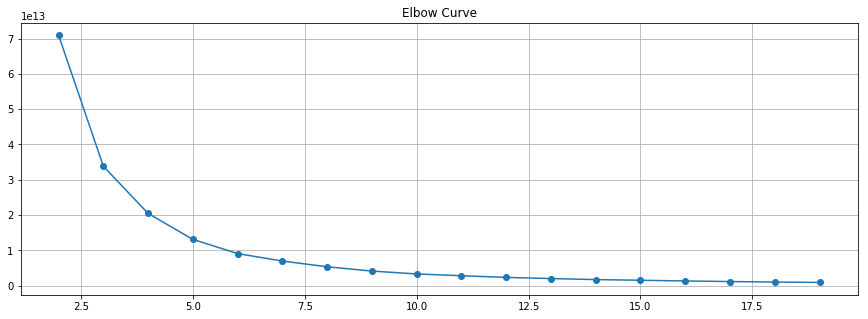

In [49]:
sse =[]
for k in range (2,20):
    kmeans = KMeans(n_clusters=k, random_state = 0).fit(mat)
    sse.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20), sse, marker = 'o')
plt.grid(True)
plt.title('Elbow Curve')



Now we will have the array (with lenght the number of rows of the matrix) and each element of the array will have the number of the cluster to which it belongs.
We define also a function that count the number of occurences and then it will give the dictionary with the cluster as key and the number of records belonging to this cluster as value.

In [46]:
kmeans = KMeans(n_clusters=4, random_state = 0).fit(mat)
arr = kmeans.labels_

In [47]:
def clusval(arr):
    
    d = {}
    for i in range(len(arr)):
        if arr[i] not in d:
            d[arr[i]] = 1
        else:
            d[arr[i]] = d[arr[i]] + 1
    
    return d


clusval(arr)
    

{2: 2544, 1: 689, 0: 1958, 3: 1168}